In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(data=iris.data, columns=cols)
df["target"]=iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


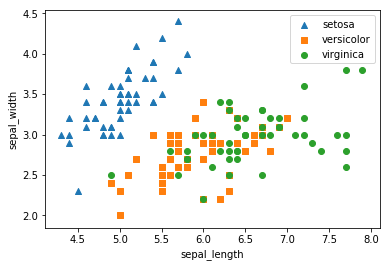

In [4]:
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df[df["target"] ==i]["sepal_length"]
    y_val = df[df["target"]==i]["sepal_width"]
    plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
print(df_pca.shape)

(150, 2)


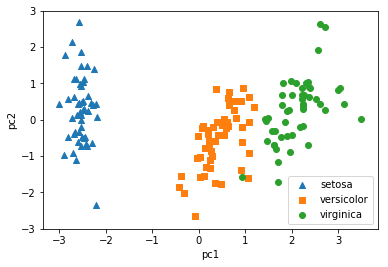

[0.76740358 0.18282727]


In [11]:
cols = ["pc1", "pc2"]
df_pca = pd.DataFrame(data=df_pca, columns=cols)
df_pca["target"] = iris.target

markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca["target"] ==i]["pc1"]
    y_val = df_pca[df_pca["target"]==i]["pc2"]
    plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

print(pca.explained_variance_ratio_)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestClassifier()

scores = cross_val_score(rf, iris.data, iris.target, scoring="accuracy",cv=3)
print("normal accuracy : {0:.3f}".format(np.mean(scores)))
scores = cross_val_score(rf, df_pca.iloc[:,:-1], df_pca.iloc[:,-1], scoring="accuracy", cv=3)
print("pca accuracy : {0:.3f}".format(np.mean(scores)))



normal accuracy : 0.967
pca accuracy : 0.987
